## Problem Statement: Hotstar Content Analytics
#### Objective:
The goal of this project is to analyze the content library of the Hotstar streaming platform to uncover patterns in content type, genre, release trends, and structural characteristics (like seasons, episodes, and runtime). By leveraging this analysis, we aim to derive actionable insights that can inform content strategy and user engagement models.

Key Questions:

1.What is the distribution of content types (e.g., Movies vs TV Shows)?

2.Which genres are most frequently produced and how do they vary across content types?

3.How has content production evolved over the years on the platform?

4.Which genres have the highest volume of content, and how has their popularity changed over the years?

5.How are seasons and episodes distributed across various TV show genres?

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotstar.csv', lineterminator = '\n')

In [3]:
df.head()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type\r
0,1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,NaN,NaN,movie\r
1,1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,NaN,NaN,movie\r
2,1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,NaN,NaN,movie\r
3,1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,NaN,NaN,movie\r
4,1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,NaN,NaN,movie\r


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6874 entries, 0 to 6873
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    6874 non-null   int64  
 1   title         6874 non-null   object 
 2   description   6874 non-null   object 
 3   genre         6874 non-null   object 
 4   year          6874 non-null   int64  
 5   age_rating    6874 non-null   object 
 6   running_time  4568 non-null   float64
 7   seasons       2306 non-null   float64
 8   episodes      2306 non-null   float64
         6874 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 537.2+ KB


In [5]:
 df.isnull().sum()

hotstar_id         0
title              0
description        0
genre              0
year               0
age_rating         0
running_time    2306
seasons         4568
episodes        4568
type\r             0
dtype: int64

## Replae missing values with 0

In [6]:
df['seasons'] = df['seasons'].fillna(0).astype(int)
df['episodes'] = df['episodes'].fillna(0).astype(int)

## Droping Irrelevant columns

In [7]:
columns_to_drop = ['hotstar_id', 'description', 'running_time', 'age_rating']
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df.head()

,title,genre,year,seasons,episodes,type\r
0,Sambha - Aajcha Chawa,Action,2012,0,0,movie\r
1,Cars Toon: Mater And The Ghostlight,Animation,2006,0,0,movie\r
2,Kanmani Rambo Khatija,Romance,2022,0,0,movie\r
3,Butterfly,Thriller,2022,0,0,movie\r
4,Sister Act,Comedy,1992,0,0,movie\r


## Convert datatype from float to Date-time

In [9]:
df['year'] = pd.to_datetime(df['year'].astype(int), format='%Y')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6874 entries, 0 to 6873
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     6874 non-null   object        
 1   genre     6874 non-null   object        
 2   year      6874 non-null   datetime64[ns]
 3   seasons   6874 non-null   int64         
 4   episodes  6874 non-null   int64         
     6874 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 322.3+ KB


## Summary

- Missing Values: All NaN values were replaced with 0 to ensure consistency across numeric columns such as seasons, and episodes.

- Column Removal: Irrelevant columns including hotstar_id, description, running_time and age_rating were dropped to reduce noise and focus on meaningful features.

- Data Type Conversion: The year column was converted from  floating-point to Date-time format to enables Time-Series Analysis.

### 1. What is the distribution of content types (e.g., Movies vs TV Shows)?

type
movie    4568
tv       2306
Name: count, dtype: int64


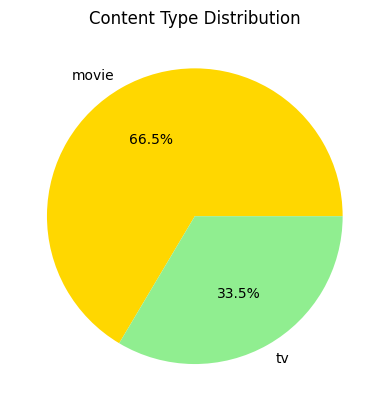

In [11]:
df.columns = df.columns.str.strip().str.lower()
df['type'] = df['type'].str.strip().str.lower()

type_counts = df['type'].value_counts()
print(type_counts)

# Plot
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['gold', 'lightgreen'], 
                                   title='Content Type Distribution', ylabel='')
plt.show()


## 2.Which genres are most frequently produced and how do they vary across content types?

In [12]:
df.columns = df.columns.str.strip().str.lower()
df['type'] = df['type'].str.strip().str.lower()
df['genre'] = df['genre'].str.strip().str.lower()

# Step 2: Group by genre and type (movie/tv)
genre_type_counts = df.groupby(['genre', 'type']).size().unstack().fillna(0)

# Step 3: Add total column
genre_type_counts['total'] = genre_type_counts.sum(axis=1)

# Step 4: Sort by total content
genre_type_counts = genre_type_counts.sort_values(by='total', ascending=False)

# Optional: Show top 10 genres
print(genre_type_counts.head(10))

type          movie     tv   total
genre                             
drama        1540.0  503.0  2043.0
comedy        526.0  265.0   791.0
romance       494.0  148.0   642.0
action        559.0   60.0   619.0
reality         0.0  401.0   401.0
thriller      308.0   44.0   352.0
family        154.0  109.0   263.0
animation     238.0    2.0   240.0
documentary   134.0   73.0   207.0
sport           2.0  178.0   180.0


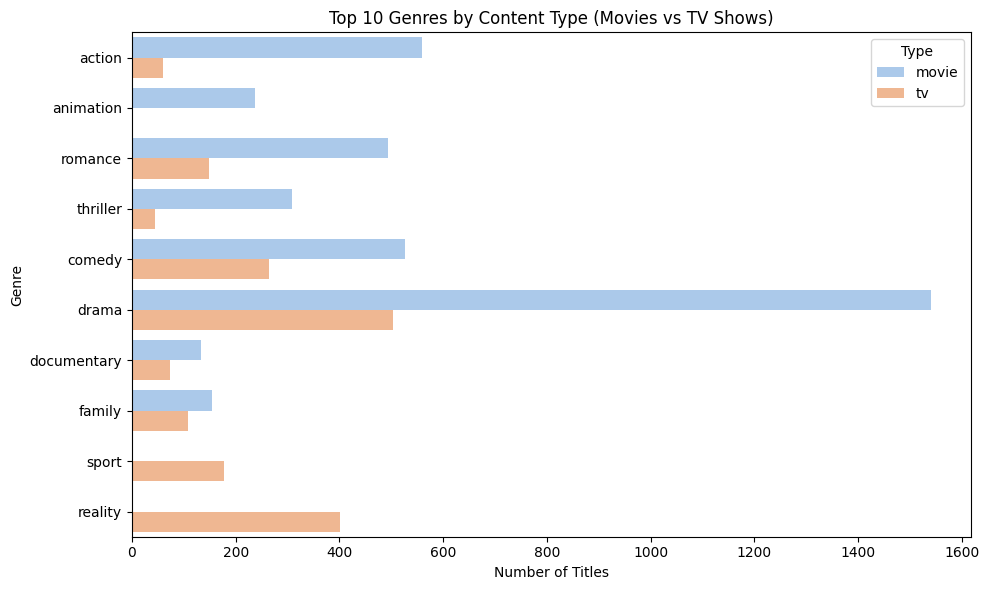

In [13]:

top_genres = df['genre'].value_counts().head(10).index.tolist()
filtered = df[df['genre'].isin(top_genres)]

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered, y='genre', hue='type', palette='pastel')
plt.title('Top 10 Genres by Content Type (Movies vs TV Shows)')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


## 3.How has content production evolved over the years on the platform?

In [14]:
# Count how many titles were released per year
yearly_counts = df['year'].dt.year.value_counts().sort_index()
yearly_counts = yearly_counts[yearly_counts >= 10]
print(yearly_counts)



year
1965     10
1971     11
1972     13
1973     15
1974     11
1977     18
1978     15
1979     14
1980     15
1981     21
1982     23
1983     19
1984     17
1985     34
1986     32
1987     27
1988     33
1989     27
1990     46
1991     42
1992     53
1993     36
1994     37
1995     38
1996     44
1997     59
1998     54
1999     54
2000     42
2001     53
2002     56
2003     61
2004     65
2005    124
2006    105
2007    139
2008    154
2009    179
2010    202
2011    194
2012    178
2013    213
2014    241
2015    355
2016    423
2017    513
2018    449
2019    498
2020    415
2021    561
2022    609
2023    133
Name: count, dtype: int64


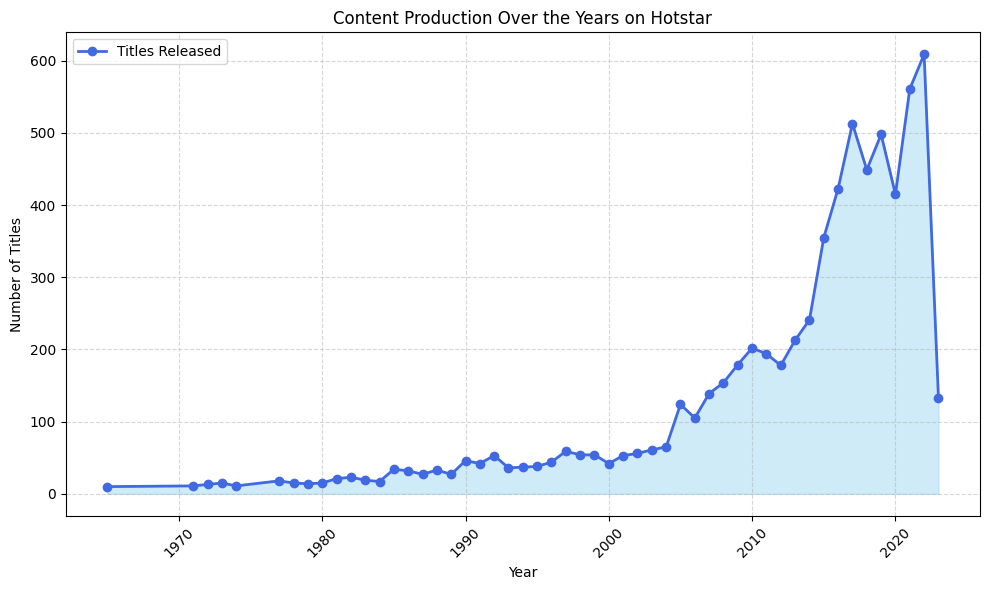

In [15]:
yearly_counts = yearly_counts[yearly_counts >= 10]

# Step 4: Plot area chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, color='royalblue', linewidth=2, marker='o', label='Titles Released')
plt.fill_between(yearly_counts.index, yearly_counts.values, color='skyblue', alpha=0.4)

# Step 5: Styling
plt.title('Content Production Over the Years on Hotstar')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 4.Which genres have the highest volume of content, and how has their popularity changed over the years?

In [16]:
top_genres = df['genre'].value_counts().head(5).index.tolist() 
print("Top Genres:", top_genres)



Top Genres: ['drama', 'comedy', 'romance', 'action', 'reality']


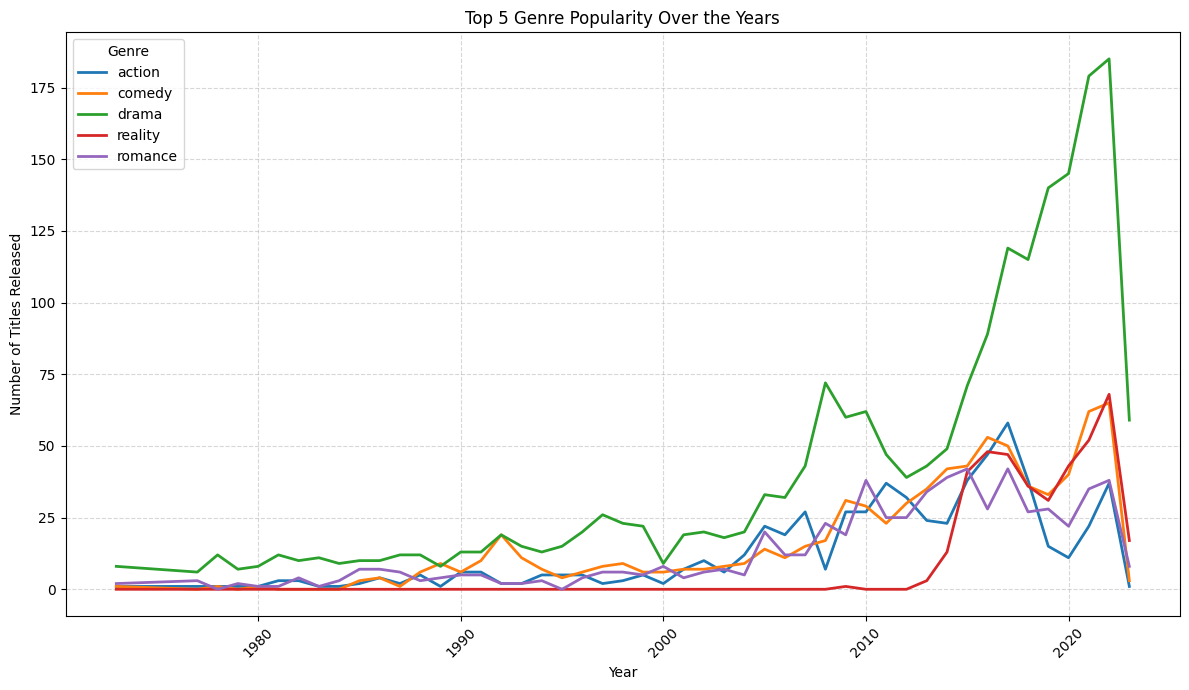

In [17]:
filtered_df = df[df['genre'].isin(top_genres)]

# Step 3: Group by year and genre, count titles
genre_trend = filtered_df.groupby(['year', 'genre']).size().unstack(fill_value=0)

# Optional: Filter out years with low volume (for cleaner chart)
genre_trend = genre_trend[genre_trend.sum(axis=1) >= 10]

# Step 4: Plot
plt.figure(figsize=(12, 7))
for genre in genre_trend.columns:
    plt.plot(genre_trend.index, genre_trend[genre], label=genre, linewidth=2)

plt.title('Top 5 Genre Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')
plt.legend(title='Genre')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5.How are seasons and episodes distributed across various TV show genres?



In [18]:
tv_df = df[df['type'] == 'tv'].copy()

#Convert columns to numeric
tv_df['seasons'] = pd.to_numeric(tv_df['seasons'], errors='coerce')
tv_df['episodes'] = pd.to_numeric(tv_df['episodes'], errors='coerce')

#Group by genre and calculate averages
summary = tv_df.groupby('genre')[['seasons', 'episodes']].mean().round(2)
summary = summary.sort_values(by='episodes', ascending=False)


top_genres = summary.head(5)


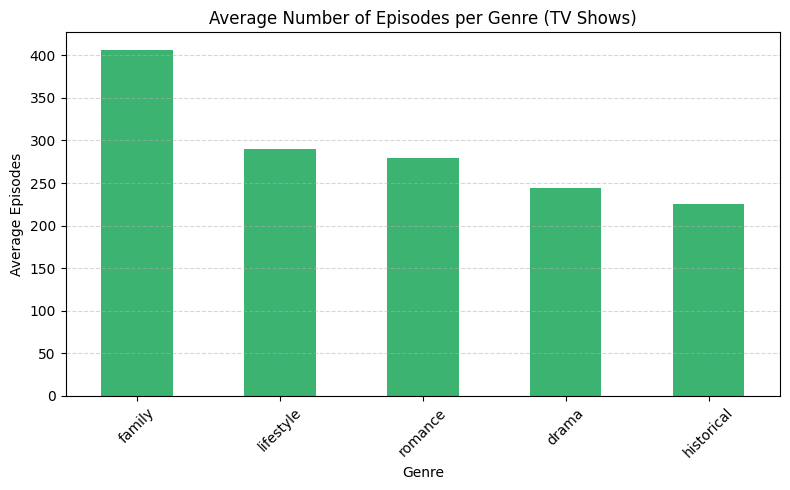

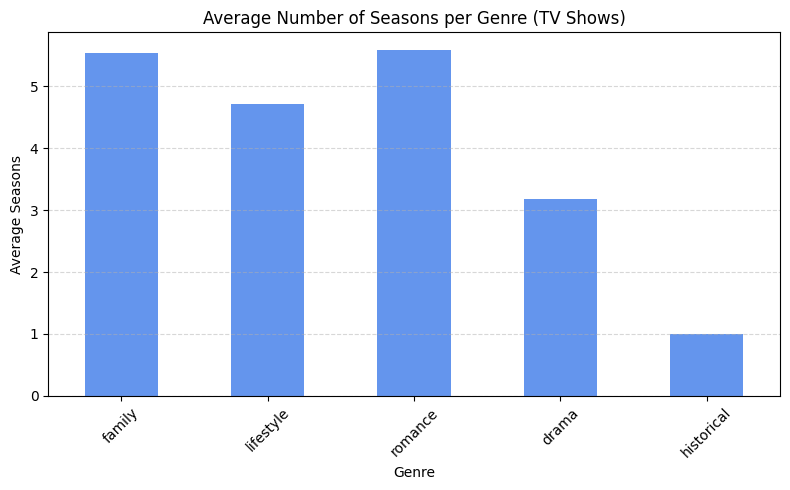

In [19]:
plt.figure(figsize=(8, 5))
top_genres['episodes'].plot(kind='bar', color='mediumseagreen')
plt.title('Average Number of Episodes per Genre (TV Shows)')
plt.xlabel('Genre')
plt.ylabel('Average Episodes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Step 7: Plot Average Seasons per Genre
plt.figure(figsize=(8, 5))
top_genres['seasons'].plot(kind='bar', color='cornflowerblue')
plt.title('Average Number of Seasons per Genre (TV Shows)')
plt.xlabel('Genre')
plt.ylabel('Average Seasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Conclusion

1. Distribution of Content Types (Movies vs TV Shows):
   The dataset reveals that movies constitute a higher proportion of content on the platform compared to TV shows. This indicates a stronger focus on standalone content, likely due to its lower production lifecycle and faster release frequency.

2. Genre Production by Content Type:
   Certain genres like Drama, Action, and Romance dominate the catalog. Interestingly, Drama is prevalent across both movies and TV shows, while genres like Animation and Kids are more prominent in TV shows. This reflects the platform’s aim to cater to diverse audience segments using genre specialization across formats.

3. Content Production Trend Over the Years:
   Content production has seen a significant rise in recent years, especially after 2015. This surge likely aligns with the growing demand for digital streaming and increased investment in original and regional content. However, only a few years accounted for a large share of content, suggesting periodic spikes in production rather than consistent year-on-year growth.

4. Genre Volume and Popularity Over Time:
   Top genres such as Drama, Comedy, and Thriller not only have the highest volume overall but also show varied popularity trends over the years. Some genres like Comedy have seen steady growth, while others like Thriller showed more volatile patterns, reflecting changing viewer preferences and experimental content strategies by the platform.

5. TV Show Structure Across Genres (Seasons & Episodes):
   The analysis of TV shows shows that genres like Drama and Reality tend to have a higher number of episodes and seasons on average, indicating long-form storytelling or recurring formats. In contrast, genres such as Documentary or Animation tend to have shorter series, often limited in scope or designed for targeted audiences.
